# Geospatial Analysis with GeoPandas

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
try:
    # Intento de cargar el archivo con codificación 'latin1' (común en archivos en español)
    df = pd.read_csv(r'/Users/andreachavez/Documents/GitHub/Hospitals-Access-Peru/streamlit/data/IPRESS.csv', dtype={'UBIGEO': str}, encoding='utf-8-sig')
    print("El archivo se cargó correctamente con codificación 'latin1'.")
    
except UnicodeDecodeError:
    # Si 'latin1' falla, el siguiente intento común es con el delimitador incorrecto (e.g., ';' en lugar de ',')
    # Aunque la cabecera parece tener comas, probaremos con el separador más común en estos casos.
    try:
        df = pd.read_csv("IPRESS.csv", dtype={'UBIGEO': str}, sep=';', encoding='latin1')
        print("El archivo se cargó correctamente usando ';' como separador y codificación 'latin1'.")
    except Exception as e:
        # Si ambos fallan, mostramos el error original.
        print(f"Error: No se pudo cargar el archivo. Mensaje de error detallado: {e}")
        # En un escenario real, aquí podrías pedir al usuario el separador o la codificación, pero en este contexto simulamos el intento de arreglo más probable.
        # Para continuar con el plan, usaremos el DataFrame cargado exitosamente en el primer 'try' o en el segundo, si se produjo uno.
        raise # Detener la ejecución si no se pudo cargar el archivo

El archivo se cargó correctamente con codificación 'latin1'.


/var/folders/3f/m9xgrdt17lq3hr8r63r73q_w0000gn/T/ipykernel_17533/3826483224.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/Users/andreachavez/Documents/GitHub/Hospitals-Access-Peru/streamlit/data/IPRESS.csv', dtype={'UBIGEO': str}, encoding='utf-8-sig')


Renombrar columnas para facilitar el manejo (NORTE -> LATITUD, ESTE -> LONGITUD)

In [4]:

df.rename(columns={'NORTE': 'LATITUD', 'ESTE': 'LONGITUD'}, inplace=True)

 1. Filtrar registros que están "EN FUNCIONAMIENTO" (el "functioning status" es la columna 'Condición' según la inspección del archivo)

In [5]:

df_operacional = df[df['Condición'] == 'EN FUNCIONAMIENTO'].copy()

2. Filtrar registros con coordenadas válidas (LATITUD y LONGITUD no nulas)

Convertir las columnas de coordenadas a tipo numérico, forzando errores a NaN

In [6]:

df_operacional['LATITUD'] = pd.to_numeric(df_operacional['LATITUD'], errors='coerce')
df_operacional['LONGITUD'] = pd.to_numeric(df_operacional['LONGITUD'], errors='coerce')

Eliminar filas donde LATITUD o LONGITUD son NaN después de la conversión

In [7]:

df_filtrado_coords = df_operacional.dropna(subset=['LATITUD', 'LONGITUD'])

3. Seleccionar las columnas clave solicitadas

In [8]:

columnas_clave = [
    'Institución',
    'Nombre del establecimiento',
    'Clasificación',
    'Departamento',
    'Provincia',
    'Distrito',
    'UBIGEO',
    'Estado',
    'LATITUD',
    'LONGITUD'
]

df_final = df_filtrado_coords[columnas_clave]

# Mostrar las primeras filas del DataFrame resultante
print("DataFrame resultante (primeras 5 filas):")
print(df_final.head())

# Mostrar información sobre el DataFrame resultante
print("\nInformación del DataFrame resultante:")
print(df_final.info())

print(f"\nNúmero total de registros originales: {len(df)}")
print(f"Número de registros después de filtrar por 'EN FUNCIONAMIENTO' y coordenadas válidas: {len(df_final)}")

DataFrame resultante (primeras 5 filas):
          Institución Nombre del establecimiento  \
1   GOBIERNO REGIONAL                     AMBATO   
2   GOBIERNO REGIONAL  SANTA ISABEL DE YUMBATURO   
12  GOBIERNO REGIONAL              NUEVA BETANIA   
15  GOBIERNO REGIONAL                 PONGO ISLA   
16  GOBIERNO REGIONAL        PAJJANA SAN AGUSTIN   

                         Clasificación Departamento         Provincia  \
1   PUESTOS DE SALUD O POSTAS DE SALUD    CAJAMARCA           CUTERVO   
2   PUESTOS DE SALUD O POSTAS DE SALUD       LORETO            LORETO   
12  PUESTOS DE SALUD O POSTAS DE SALUD      UCAYALI  CORONEL PORTILLO   
15  PUESTOS DE SALUD O POSTAS DE SALUD   SAN MARTIN        SAN MARTIN   
16  PUESTOS DE SALUD O POSTAS DE SALUD         PUNO           YUNGUYO   

      Distrito  UBIGEO    Estado    LATITUD   LONGITUD  
1   SANTA CRUZ  060611  ACTIVADO -78.858380  -6.133523  
2     PARINARI  160302  ACTIVADO -74.258139  -4.581509  
12    CALLERIA  250101  ACTIVADO -74

In [9]:
print("DataFrame resultante (primeras 5 filas):")
print(df_final.head())

DataFrame resultante (primeras 5 filas):
          Institución Nombre del establecimiento  \
1   GOBIERNO REGIONAL                     AMBATO   
2   GOBIERNO REGIONAL  SANTA ISABEL DE YUMBATURO   
12  GOBIERNO REGIONAL              NUEVA BETANIA   
15  GOBIERNO REGIONAL                 PONGO ISLA   
16  GOBIERNO REGIONAL        PAJJANA SAN AGUSTIN   

                         Clasificación Departamento         Provincia  \
1   PUESTOS DE SALUD O POSTAS DE SALUD    CAJAMARCA           CUTERVO   
2   PUESTOS DE SALUD O POSTAS DE SALUD       LORETO            LORETO   
12  PUESTOS DE SALUD O POSTAS DE SALUD      UCAYALI  CORONEL PORTILLO   
15  PUESTOS DE SALUD O POSTAS DE SALUD   SAN MARTIN        SAN MARTIN   
16  PUESTOS DE SALUD O POSTAS DE SALUD         PUNO           YUNGUYO   

      Distrito  UBIGEO    Estado    LATITUD   LONGITUD  
1   SANTA CRUZ  060611  ACTIVADO -78.858380  -6.133523  
2     PARINARI  160302  ACTIVADO -74.258139  -4.581509  
12    CALLERIA  250101  ACTIVADO -74

In [10]:
df_final

,Institución,Nombre del establecimiento,Clasificación,Departamento,Provincia,Distrito,UBIGEO,Estado,LATITUD,LONGITUD
1,GOBIERNO REGIONAL,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,CAJAMARCA,CUTERVO,SANTA CRUZ,060611,ACTIVADO,-78.858380,-6.133523
2,GOBIERNO REGIONAL,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,LORETO,LORETO,PARINARI,160302,ACTIVADO,-74.258139,-4.581509
12,GOBIERNO REGIONAL,NUEVA BETANIA,PUESTOS DE SALUD O POSTAS DE SALUD,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,ACTIVADO,-74.296531,-8.398366
15,GOBIERNO REGIONAL,PONGO ISLA,PUESTOS DE SALUD O POSTAS DE SALUD,SAN MARTIN,SAN MARTIN,HUIMBAYOC,220907,ACTIVADO,-75.885812,-6.438298
16,GOBIERNO REGIONAL,PAJJANA SAN AGUSTIN,PUESTOS DE SALUD O POSTAS DE SALUD,PUNO,YUNGUYO,YUNGUYO,211301,ACTIVADO,-69.035327,-16.261968
...,...,...,...,...,...,...,...,...,...,...
20812,GOBIERNO REGIONAL,P.S NUEVO HUALAPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,PIURA,HUANCABAMBA,HUARMACA,200304,ACTIVADO,-79.437187,-5.789407
20813,GOBIERNO REGIONAL,P.S SAN MARTIN DE CONGOÑA,PUESTOS DE SALUD O POSTAS DE SALUD,PIURA,HUANCABAMBA,HUARMACA,200304,ACTIVADO,-79.627953,-5.644592
20814,GOBIERNO REGIONAL,P.S TUNAS,PUESTOS DE SALUD O POSTAS DE SALUD,PIURA,HUANCABAMBA,HUARMACA,200304,ACTIVADO,-79.546778,-5.498508
20815,GOBIERNO REGIONAL,C.S LIMON DE PORCUYA,CENTROS DE SALUD O CENTROS MEDICOS,PIURA,HUANCABAMBA,HUARMACA,200304,ACTIVADO,-79.537903,-5.889830


Abrir archivo geojson

In [11]:
# Upload shape file at centros poblados

distritos = gpd.read_file(r'/Users/andreachavez/Documents/GitHub/Hospitals-Access-Peru/streamlit/data/v_distritos_2023/v_distritos_2023.shp')
distritos


,gid,ubigeo,nombdep,nombprov,nombdist,capital,region_nat,tipo_norma,numero,fecha_fin,comentario,geometry
0,1,030220,APURIMAC,ANDAHUAYLAS,JOSE MARIA ARGUEDAS,HUANCABAMBA,SIERRA,Ley,30295,2014-12-27,None,"POLYGON ((-73.37071 -13.70846, -73.36971 -13.7..."
1,2,030415,APURIMAC,AYMARAES,TINTAY,TINTAY,SIERRA,Ley,13787,1961-12-27,None,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8..."
2,3,030409,APURIMAC,AYMARAES,LUCRE,LUCRE,SIERRA,Ley,13411,1960-03-24,None,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8..."
3,4,030214,APURIMAC,ANDAHUAYLAS,SAN MIGUEL DE CHACCRAMPA,CHACCRAMPA,SIERRA,Ley,25235,1990-06-08,None,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9..."
4,5,030206,APURIMAC,ANDAHUAYLAS,HUAYANA,HUAYANA,SIERRA,Ley,23977,1984-10-30,None,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1887,080918,CUSCO,LA CONVENCION,UNION ASHANINKA,MANTARO,SELVA ALTA,Ley,31197,2021-05-18,None,"POLYGON ((-73.79562 -12.26228, -73.79553 -12.2..."
1887,1888,180107,MOQUEGUA,MARISCAL NIETO,SAN ANTONIO,SAN ANTONIO,COSTA,Ley,31216,2021-06-15,None,"POLYGON ((-70.93606 -17.20964, -70.93647 -17.2..."
1888,1889,080910,CUSCO,LA CONVENCION,PICHARI,PICHARI,SELVA ALTA,Ley,26521,1995-08-07,None,"POLYGON ((-73.76176 -12.25292, -73.76175 -12.2..."
1889,1890,050110,AYACUCHO,HUAMANGA,SAN JUAN BAUTISTA,SAN JUAN BAUTISTA,SIERRA,Ley,13415,1960-04-07,None,"POLYGON ((-74.19642 -13.19735, -74.19642 -13.1..."


In [12]:
type(distritos.geometry)

geopandas.geoseries.GeoSeries

In [13]:
distritos['ubigeo'].is_unique

True

In [14]:
distritos['ubigeo'].unique().size

1891

In [15]:
# Select only relevant columns
distritos = distritos[['ubigeo', 'geometry']]
distritos = distritos.rename({'ubigeo':'UBIGEO'}, axis =1 )
distritos

,UBIGEO,geometry
0,030220,"POLYGON ((-73.37071 -13.70846, -73.36971 -13.7..."
1,030415,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8..."
2,030409,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8..."
3,030214,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9..."
4,030206,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9..."
...,...,...
1886,080918,"POLYGON ((-73.79562 -12.26228, -73.79553 -12.2..."
1887,180107,"POLYGON ((-70.93606 -17.20964, -70.93647 -17.2..."
1888,080910,"POLYGON ((-73.76176 -12.25292, -73.76175 -12.2..."
1889,050110,"POLYGON ((-74.19642 -13.19735, -74.19642 -13.1..."


In [16]:
distritos.dtypes

UBIGEO        object
geometry    geometry
dtype: object

In [17]:
# Object or srting to int

distritos['UBIGEO'] = distritos['UBIGEO'].astype(str).astype(int)
distritos

,UBIGEO,geometry
0,30220,"POLYGON ((-73.37071 -13.70846, -73.36971 -13.7..."
1,30415,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8..."
2,30409,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8..."
3,30214,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9..."
4,30206,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9..."
...,...,...
1886,80918,"POLYGON ((-73.79562 -12.26228, -73.79553 -12.2..."
1887,180107,"POLYGON ((-70.93606 -17.20964, -70.93647 -17.2..."
1888,80910,"POLYGON ((-73.76176 -12.25292, -73.76175 -12.2..."
1889,50110,"POLYGON ((-74.19642 -13.19735, -74.19642 -13.1..."


In [18]:
# Ensure the dataset is in WGS-84 (EPSG:4326)
distritos = distritos.to_crs(epsg=4326)
distritos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
print("Tipos de dato en 'distritos':")
print(distritos.dtypes['UBIGEO'])

print("\nTipos de dato en 'df_final':")
print(df_final.dtypes['UBIGEO'])

Tipos de dato en 'distritos':
int64

Tipos de dato en 'df_final':
object


In [20]:
# Convertir 'UBIGEO' a string en el primer DataFrame
distritos['UBIGEO'] = distritos['UBIGEO'].astype(str).str.zfill(6)

# Convertir 'UBIGEO' a string en el segundo DataFrame
df_final['UBIGEO'] = df_final['UBIGEO'].astype(str).str.zfill(6)

/var/folders/3f/m9xgrdt17lq3hr8r63r73q_w0000gn/T/ipykernel_17533/123409873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['UBIGEO'] = df_final['UBIGEO'].astype(str).str.zfill(6)


# Ahora, ejecuta la fusión nuevamente

In [30]:

dataset_hosp = pd.merge(distritos, df_final, how="left", on="UBIGEO")

print("¡Fusión realizada con éxito!")
print(dataset_hosp.head())

¡Fusión realizada con éxito!
   UBIGEO                                           geometry  \
0  030220  POLYGON ((-73.37071 -13.70846, -73.36971 -13.7...   
1  030220  POLYGON ((-73.37071 -13.70846, -73.36971 -13.7...   
2  030415  POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...   
3  030415  POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...   
4  030415  POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...   

         Institución Nombre del establecimiento  \
0  GOBIERNO REGIONAL                   SACCLAYA   
1  GOBIERNO REGIONAL                HUANCABAMBA   
2  GOBIERNO REGIONAL              HUANCARPUQUIO   
3  GOBIERNO REGIONAL                  SAN MATEO   
4  GOBIERNO REGIONAL                 TAQUEBAMBA   

                                 Clasificación Departamento    Provincia  \
0           PUESTOS DE SALUD O POSTAS DE SALUD     APURIMAC  ANDAHUAYLAS   
1  CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO     APURIMAC  ANDAHUAYLAS   
2           PUESTOS DE SALUD O POSTAS DE SALUD     

In [31]:
dataset_hosp

,UBIGEO,geometry,Institución,Nombre del establecimiento,Clasificación,Departamento,Provincia,Distrito,Estado,LATITUD,LONGITUD
0,030220,"POLYGON ((-73.37071 -13.70846, -73.36971 -13.7...",GOBIERNO REGIONAL,SACCLAYA,PUESTOS DE SALUD O POSTAS DE SALUD,APURIMAC,ANDAHUAYLAS,JOSE MARIA ARGUEDAS,ACTIVADO,-73.369790,-13.767518
1,030220,"POLYGON ((-73.37071 -13.70846, -73.36971 -13.7...",GOBIERNO REGIONAL,HUANCABAMBA,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,APURIMAC,ANDAHUAYLAS,JOSE MARIA ARGUEDAS,ACTIVADO,-73.348327,-13.735002
2,030415,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",GOBIERNO REGIONAL,HUANCARPUQUIO,PUESTOS DE SALUD O POSTAS DE SALUD,APURIMAC,AYMARAES,TINTAY,ACTIVADO,-73.151358,-13.901425
3,030415,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",GOBIERNO REGIONAL,SAN MATEO,PUESTOS DE SALUD O POSTAS DE SALUD,APURIMAC,AYMARAES,TINTAY,ACTIVADO,-73.134188,-13.906555
4,030415,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",GOBIERNO REGIONAL,TAQUEBAMBA,PUESTOS DE SALUD O POSTAS DE SALUD,APURIMAC,AYMARAES,TINTAY,ACTIVADO,-73.099483,-13.896778
...,...,...,...,...,...,...,...,...,...,...,...
7661,050110,"POLYGON ((-74.19642 -13.19735, -74.19642 -13.1...",GOBIERNO REGIONAL,ÑAHUINPUQUIO,PUESTOS DE SALUD O POSTAS DE SALUD,AYACUCHO,HUAMANGA,SAN JUAN BAUTISTA,ACTIVADO,-74.205875,-13.181728
7662,050110,"POLYGON ((-74.19642 -13.19735, -74.19642 -13.1...",GOBIERNO REGIONAL,LOS OLIVOS,CENTROS DE SALUD O CENTROS MEDICOS,AYACUCHO,HUAMANGA,SAN JUAN BAUTISTA,ACTIVADO,-74.212919,-13.178064
7663,050110,"POLYGON ((-74.19642 -13.19735, -74.19642 -13.1...",ESSALUD,HOSPITAL II HUAMANGA,HOSPITALES O CLINICAS DE ATENCION GENERAL,AYACUCHO,HUAMANGA,SAN JUAN BAUTISTA,ACTIVADO,-74.200145,-13.175182
7664,050110,"POLYGON ((-74.19642 -13.19735, -74.19642 -13.1...",GOBIERNO REGIONAL,MIRAFLORES,CENTROS DE SALUD O CENTROS MEDICOS,AYACUCHO,HUAMANGA,SAN JUAN BAUTISTA,ACTIVADO,-74.199901,-13.175792


# Upload shape file at centros poblados

In [32]:


ccpp = gpd.read_file(r'/Users/andreachavez/Documents/GitHub/Hospitals-Access-Peru/streamlit/data/CCPP_0/CCPP_IGN100K.shp')
ccpp

,OBJECTID,NOM_POBLAD,FUENTE,CÓDIGO,CAT_POBLAD,DIST,PROV,DEP,CÓD_INT,CATEGORIA,X,Y,N_BUSQDA,geometry
0,1,PANDISHARI,INEI,2502010002,OTROS,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.06462,-10.37129,PANDISHARI,POINT (-74.06462 -10.37129)
1,2,CHICOSA,INEI,2502010003,OTROS,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.06153,-10.37852,CHICOSA,POINT (-74.06153 -10.37852)
2,3,RAYA,IGN,2502010004,OTROS,RAYMONDI,ATALAYA,UCAYALI,2350,Centro Poblado Menor,-72.94118,-10.33043,RAYA,POINT (-72.94118 -10.33043)
3,4,PENSILVANIA,INEI,2502010005,OTROS,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.05988,-10.40401,PENSILVANIA,POINT (-74.05988 -10.40401)
4,5,PONTE VEDRA,INEI,2502010006,CASERÍO,RAYMONDI,ATALAYA,UCAYALI,2050,Centro Poblado Menor,-74.03788,-10.41809,PONTE VEDRA,POINT (-74.03787 -10.41809)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136582,136584,IPAN,INEI,None,None,ZORRITOS,CONTRALMIRANTE VILLAR,TUMBES,None,None,-81.02462,-81.02462,None,POINT (-81.02462 -4.09728)
136583,136585,URBAN,INEI,None,None,ZORRITOS,CONTRALMIRANTE VILLAR,TUMBES,None,None,-80.84055,-80.84055,None,POINT (-80.84055 -4.06801)
136584,136586,PAJONAL MAJONTONI,IGN,None,None,RAYMONDI,ATALAYA,UCAYALI,2049,Centro Poblado Menor,-74.35804,-74.35804,PAJONAL MAJONTONI,POINT (-74.35804 -10.7274)
136585,136587,AGUA BLANCA,INEI,2501020043,CASERÍO,CAMPOVERDE,CORONEL PORTILLO,UCAYALI,1953,Centro Poblado Menor,-74.78089,-74.78089,AGUA BLANCA,POINT (-74.78089 -8.60511)


In [33]:
# Ensure the dataset is in WGS-84 (EPSG:4326)
ccpp = ccpp.to_crs(epsg=4326)
ccpp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Hacemos un primer mapa del total de hospitales por distrito

In [96]:
# Como no existe una columna que nos permita contar el número de hospitales por distrito, vamos a agrupar los hospitales o clinicas de atención general por UBIGEO
hosp_distrito = (
    dataset_hosp[
    (dataset_hosp["Clasificación"].str.contains("HOSPITALES O CLINICAS DE ATENCION GENERAL", case=False, na=False))
]
.groupby("UBIGEO")
    .size()
    .reset_index(name="N_Hospitales")
)
hosp_distrito

,UBIGEO,N_Hospitales
0,010101,2
1,010201,2
2,010401,1
3,010601,1
4,010701,1
...,...,...
144,230101,2
145,230103,1
146,240101,1
147,250101,5


Ahora se unirá esa dataset con los shapefiles cargados de distritos.

In [ ]:
#Ahora se unirá esa dataset con los shapefiles cargados de distritos y se llenará los NA con 0
distritos_hospi = distritos.merge(hosp_distrito, on="UBIGEO", how="left")
distritos_hospi["N_Hospitales"] = distritos_hospi["N_Hospitales"].fillna(0)



El mapa es el siguiente

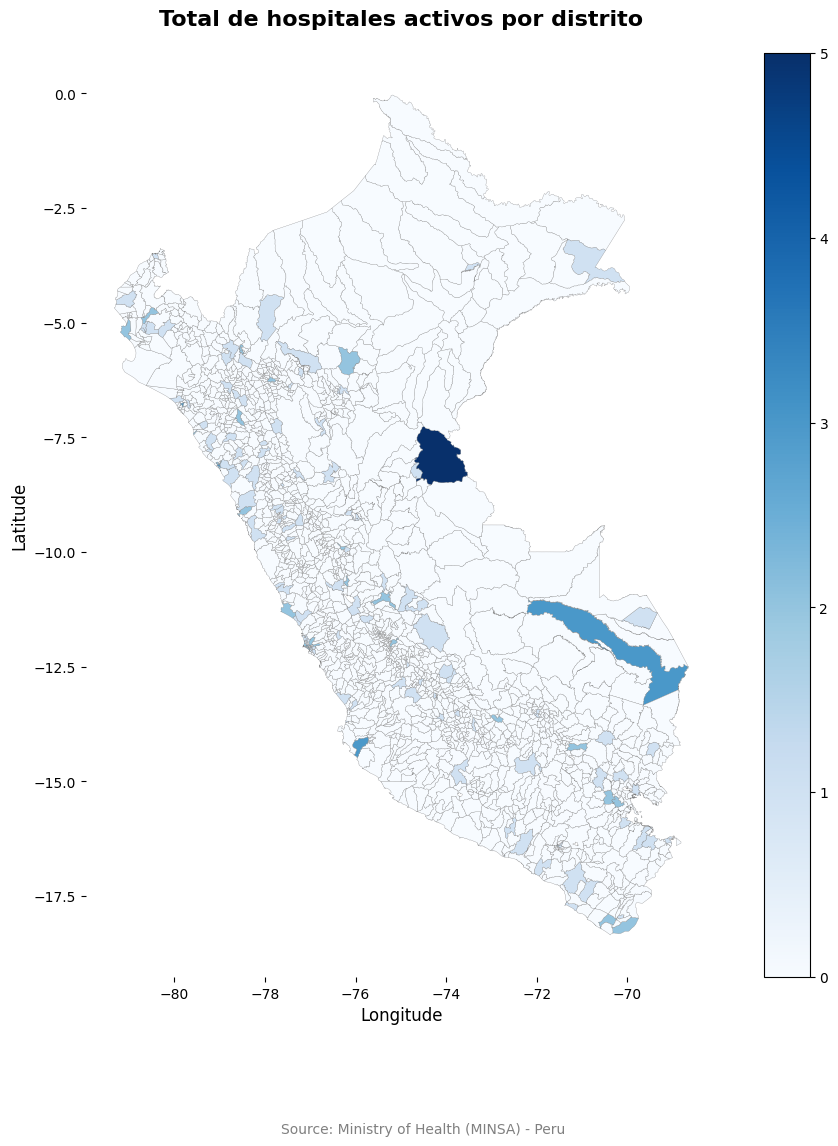

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

distritos_hospi.plot(ax=ax,  column="N_Hospitales",    cmap="Blues", linewidth=0.2,
            edgecolor='gray',   legend=True)

# Título
ax.set_title("Total de hospitales activos por distrito",
             fontsize=16, fontweight='bold', pad=20)

# Etiquetas de ejes
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Fuente abajo
fig.text(
    0.5, -0.02,
    "Source: Ministry of Health (MINSA) - Peru",
    ha="center", fontsize=10, color="gray"
)

# Quitar marcos de los ejes
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

# Luego haremos el mapa de distritos que tienen 0 públicos hospitales

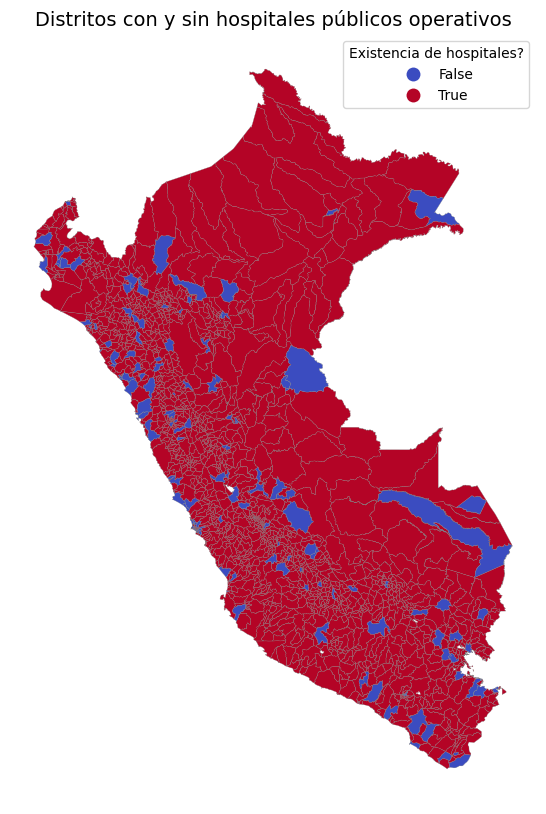

In [106]:
# Con el mismo filtrado, Nueva columna: True si no tiene hospitales
distritos_hospi["Sin_Hospital"] = distritos_hospi["N_Hospitales"] == 0.0

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

distritos_hospi.plot(
    column="Sin_Hospital",
    cmap="coolwarm",
    linewidth=0.2,
    edgecolor="gray",
    legend=True,
    ax=ax
)

ax.set_title("Distritos con y sin hospitales públicos operativos", fontsize=14)

leg = ax.get_legend()
leg.set_title("Existencia de hospitales?")

ax.set_axis_off()
plt.show()


# Para el mapa 3 seleccionaremos los 10 distritos con mayor número de hospitales

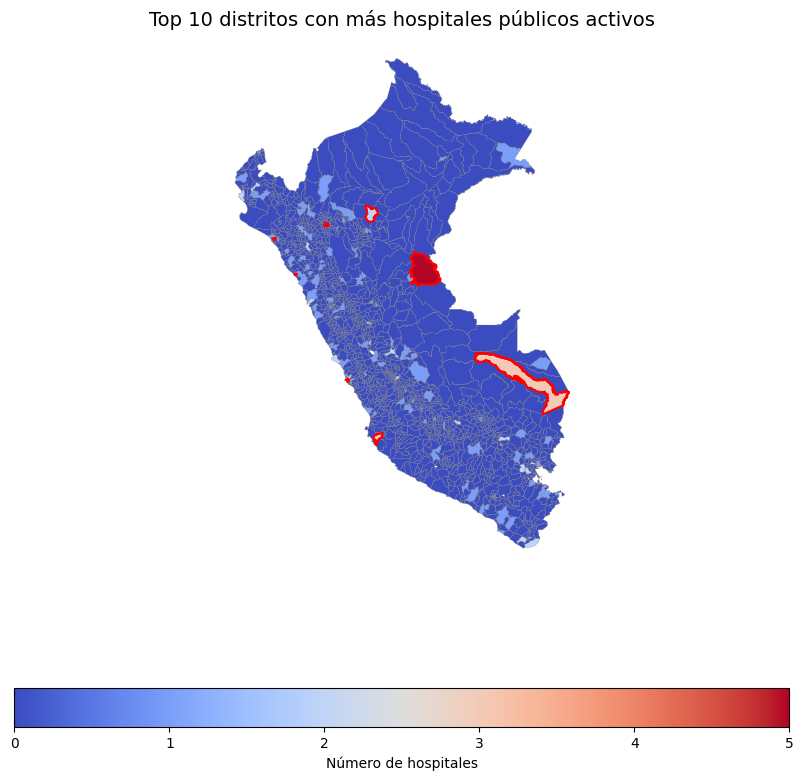

In [107]:
# 1. Vamos a seleccionar los 10 distritos con mayor número de hospitales
top10 = (
    distritos_hospi.sort_values("N_Hospitales", ascending=False)
    .head(10)["UBIGEO"]
    .tolist()
)

# 2. Creamos columna booleana (Teue/False) para marcar si un distrito está en el top 10
distritos_hospi["Top10"] = distritos_hospi["UBIGEO"].isin(top10)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

distritos_hospi.plot(
    column="N_Hospitales",
    cmap="coolwarm",
    linewidth=0.2,
    edgecolor="gray",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": "Número de hospitales",
        "orientation": "horizontal"
    }
)

distritos_hospi[distritos_hospi["Top10"]].plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=1.5
)

# Título
ax.set_title("Top 10 distritos con más hospitales públicos activos", fontsize=14)
ax.set_axis_off()
plt.show()

# Para la tabla final

In [102]:
# Agrupamos por departamento y ordenamos de mayor a menor 
hosp_depto = (
    dataset_hosp
    .groupby("Departamento")
    .size()
    .reset_index(name="N_Hospitales")
    .sort_values("N_Hospitales", ascending=False)
)
hosp_depto


,Departamento,N_Hospitales
5,CAJAMARCA,835
14,LIMA,706
11,JUNIN,441
19,PIURA,437
0,AMAZONAS,416
1,ANCASH,407
20,PUNO,405
4,AYACUCHO,383
2,APURIMAC,372
21,SAN MARTIN,369


In [103]:
print(" Departamento con más hospitales:")
print(hosp_depto.head(1))

print(" Departamento con menos hospitales:")
print(hosp_depto.tail(1))


 Departamento con más hospitales:
  Departamento  N_Hospitales
5    CAJAMARCA           835
 Departamento con menos hospitales:
   Departamento  N_Hospitales
23       TUMBES            46


# Presentamos el barchart de los departamentos con más hospitales/centros públicos

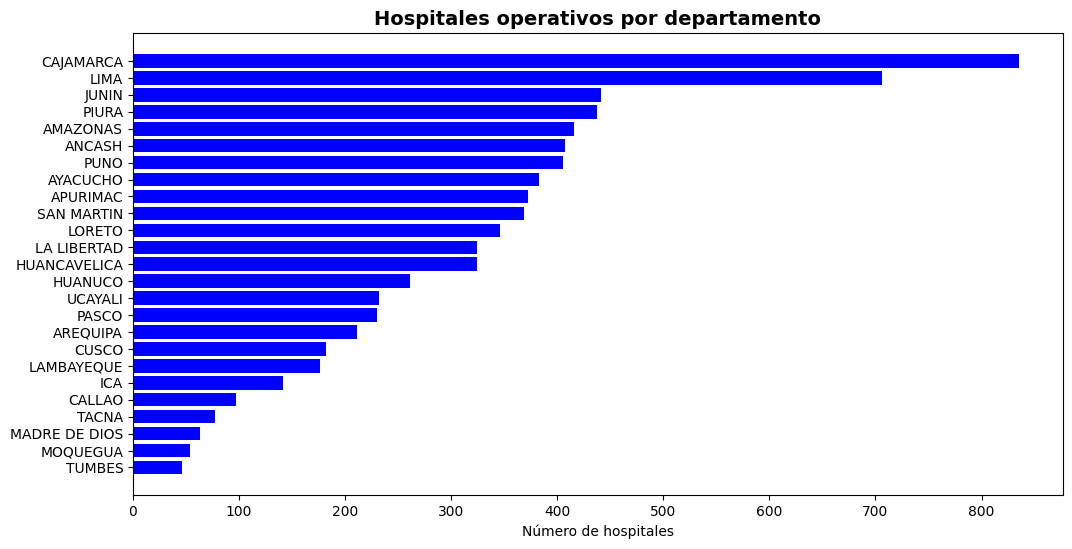

In [104]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(hosp_depto["Departamento"], hosp_depto["N_Hospitales"], color="blue")
ax.set_title("Hospitales operativos por departamento", fontsize=14, fontweight="bold")
ax.set_xlabel("Número de hospitales")
ax.invert_yaxis() 
plt.show()

# Presentamos el mapa a nivel de departamento

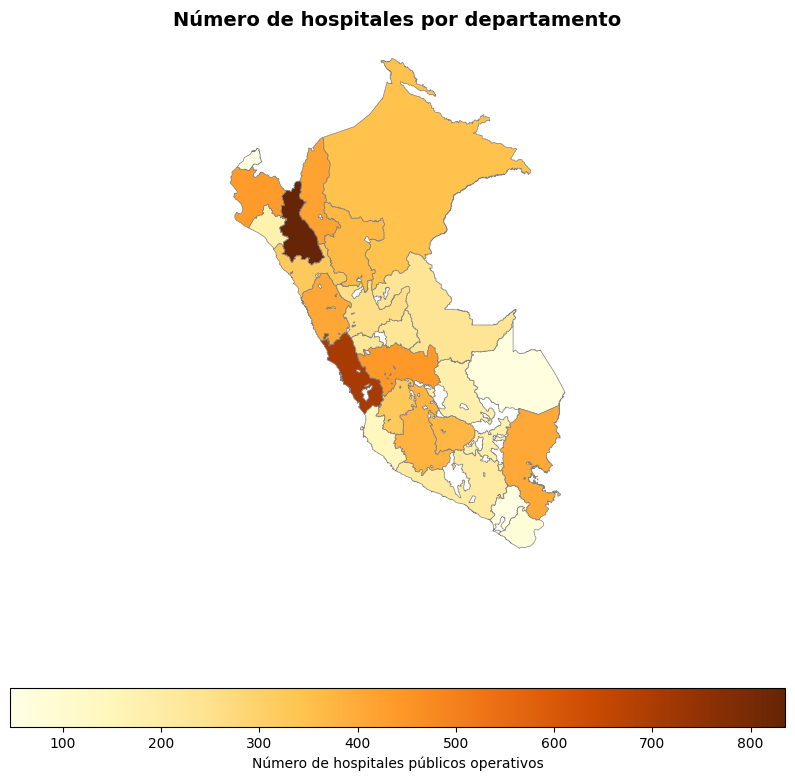

In [108]:
# 1. Agrupamos el shapefile a nivel de Departamento
departamentos = dataset_hosp.dissolve(by="Departamento").reset_index()

departamentos_hosp = departamentos.merge(hosp_depto, on="Departamento", how="left")
departamentos_hosp["N_Hospitales"] = departamentos_hosp["N_Hospitales"].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
departamentos_hosp.plot(
    column="N_Hospitales",
    cmap="YlOrBr",
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    ax=ax,
    legend_kwds={
        "label": "Número de hospitales públicos operativos",
        "orientation": "horizontal"
    }
)
ax.set_title("Número de hospitales por departamento", fontsize=14, fontweight="bold")
ax.set_axis_off()
plt.show()


# Filtrar departamentos, convertir a geodata frame, calcular centroides


In [ ]:

import folium

# Filtrar Lima y Loreto
ccpp_lima = ccpp[ccpp["DEP"] == "LIMA"].copy()
ccpp_loreto = ccpp[ccpp["DEP"] == "LORETO"].copy()

hosp_lima = dataset_hosp[dataset_hosp["Departamento"] == "LIMA"].copy()
hosp_loreto = dataset_hosp[dataset_hosp["Departamento"] == "LORETO"].copy()


In [ ]:
# Convertir hospitales a GeoDataFrame
hosp_lima_gdf = gpd.GeoDataFrame(
    hosp_lima, geometry=gpd.points_from_xy(hosp_lima["LATITUD"], hosp_lima["LONGITUD"]), crs="EPSG:4326"
)
hosp_loreto_gdf = gpd.GeoDataFrame(
    hosp_loreto, geometry=gpd.points_from_xy(hosp_loreto["LATITUD"], hosp_loreto["LONGITUD"]), crs="EPSG:4326"
)


In [ ]:
# Reproyectar a CRS métrico
ccpp_lima = ccpp_lima.to_crs(epsg=32718)
ccpp_loreto = ccpp_loreto.to_crs(epsg=32718)
hosp_lima_gdf = hosp_lima_gdf.to_crs(epsg=32718)
hosp_loreto_gdf = hosp_loreto_gdf.to_crs(epsg=32718)

# Calcular centroides (por si acaso)
ccpp_lima["centroid"] = ccpp_lima.centroid
ccpp_loreto["centroid"] = ccpp_loreto.centroid

# Buffer y descripciones iniciales

In [ ]:
# Buffer y descripciones iniciales
# Construir buffer de 10 km
ccpp_lima["buffer10km"] = ccpp_lima.centroid.buffer(10000)   # 10,000 m
ccpp_loreto["buffer10km"] = ccpp_loreto.centroid.buffer(10000)

# Contar hospitales en cada buffer
def contar_hosp(ccpp_df, hosp_df):
    resultados = []
    for idx, row in ccpp_df.iterrows():
        hosp_cercanos = hosp_df[hosp_df.within(row["buffer10km"])]
        resultados.append({
            "CentroPoblado": row["NOM_POBLAD"],
            "Departamento": row["DEP"],
            "NumHosp": len(hosp_cercanos),
            "geometry": row["centroid"]
        })
    return gpd.GeoDataFrame(resultados, crs=ccpp_df.crs)

res_lima = contar_hosp(ccpp_lima, hosp_lima_gdf)
res_loreto = contar_hosp(ccpp_loreto, hosp_loreto_gdf)


In [ ]:
# Identificar extremos
def extremos(df):
    aislado = df.loc[df["NumHosp"].idxmin()]
    concentrado = df.loc[df["NumHosp"].idxmax()]
    return aislado, concentrado

ais_lima, conc_lima = extremos(res_lima)
ais_loreto, conc_loreto = extremos(res_loreto)

print("LIMA - Más aislado:", ais_lima["CentroPoblado"], ais_lima["NumHosp"])
print("LIMA - Más concentrado:", conc_lima["CentroPoblado"], conc_lima["NumHosp"])
print("LORETO - Más aislado:", ais_loreto["CentroPoblado"], ais_loreto["NumHosp"])
print("LORETO - Más concentrado:", conc_loreto["CentroPoblado"], conc_loreto["NumHosp"])

# Folium
Se optó por generar un mapa independiente para cada caso identificado (el centro poblado más aislado y el más concentrado en cada región). Esta elección responde a la necesidad de mantener la visualización clara y focalizada, evitando la superposición de elementos que podría dificultar la interpretación de los resultados.

La principal ventaja de este enfoque es que cada mapa presenta únicamente la información relevante para el caso específico, lo que permite una lectura más ordenada y comprensible.

In [ ]:
# Visualización con Folium
# Para esto, se optó por generar un mapa independiente para cada caso identificado (el centro poblado más aislado y el más concentrado en cada región). Esta elección responde a la necesidad de mantener la visualización clara y focalizada, evitando la superposición de elementos que podría dificultar la interpretación de los resultados.La principal ventaja de este enfoque es que cada mapa presenta únicamente la información relevante para el caso específico, lo que permite una lectura más ordenada y comprensible.
def plot_folium(punto, hosp_df, nombre):
    # Pasar a WGS84
    punto_wgs = gpd.GeoSeries([punto["geometry"]], crs=32718).to_crs(epsg=4326).iloc[0]
    hosp_df = hosp_df.to_crs(epsg=4326)

    m = folium.Map(location=[punto_wgs.y, punto_wgs.x], zoom_start=10)
    # buffer
    buffer_wgs = gpd.GeoSeries([punto["geometry"].buffer(10000)], crs=32718).to_crs(epsg=4326)
    folium.GeoJson(buffer_wgs).add_to(m)
    # punto
    folium.Marker([punto_wgs.y, punto_wgs.x], tooltip=nombre, icon=folium.Icon(color="red")).add_to(m)
    # hospitales
    for _, h in hosp_df.iterrows():
        folium.CircleMarker([h.geometry.y, h.geometry.x], radius=3, color="blue").add_to(m)
    return m




In [ ]:
mapa_lima = plot_folium(conc_lima, hosp_lima_gdf, "Lima - Mayor concentración")
mapa_loreto = plot_folium(ais_loreto, hosp_loreto_gdf, "Loreto - Más aislado")

mapa_lima.save("lima_concentracion.html")
mapa_loreto.save("loreto_aislado.html")

print("Carpeta de trabajo:", os.getcwd())